In [1]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string
import io
import seaborn as sns

In [2]:
#File upload to Colabs
#from google.colab import files
#uploaded = files.upload()

In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [4]:
#Dataframe from the csv file uploaded
#df = pd.read_csv(io.BytesIO(uploaded['tripadvisor_hotel_reviews.csv']))
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#Stats not very relevant as Classification Problem. Mean is close to 4.
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
df.isnull().mean()
#No data Missing

Review    0.0
Rating    0.0
dtype: float64

In [7]:
df['Rating'].unique()
#Five Labels for Classification

array([4, 2, 3, 5, 1], dtype=int64)

In [8]:
#checking counts for each label
df['Rating'].value_counts()
#Maximum is 5 Min is 1

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

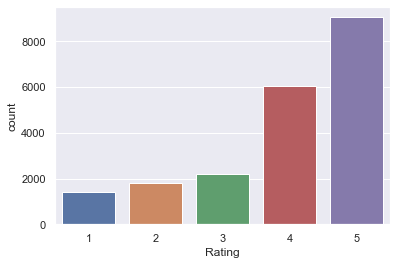

In [9]:
#Plotting Class labels on a Graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=df)


In [10]:
df.loc[df['Rating'] == 1].head(2)

,Review,Rating
15,horrible customer service hotel stay february ...,1
32,"noise airconditioner-a standard, arranged stay...",1


In [11]:
df.loc[df['Rating'] == 2].head(2)

,Review,Rating
1,ok nothing special charge diamond member hilto...,2
10,"poor value stayed monaco seattle july, nice ho...",2


In [12]:
df.loc[df['Rating'] == 3].head(2)

,Review,Rating
2,nice rooms not 4* experience hotel monaco seat...,3
13,nice hotel not nice staff hotel lovely staff q...,3


In [13]:
df.loc[df['Rating'] == 4].head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
7,"excellent staff, housekeeping quality hotel ch...",4


In [14]:
df.loc[df['Rating'] == 5].head(2)

,Review,Rating
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [15]:
#Creating a copy with Features and class labels as separate Dataset
x_Main = df['Review'].copy()
y_Main = df['Rating'].copy()

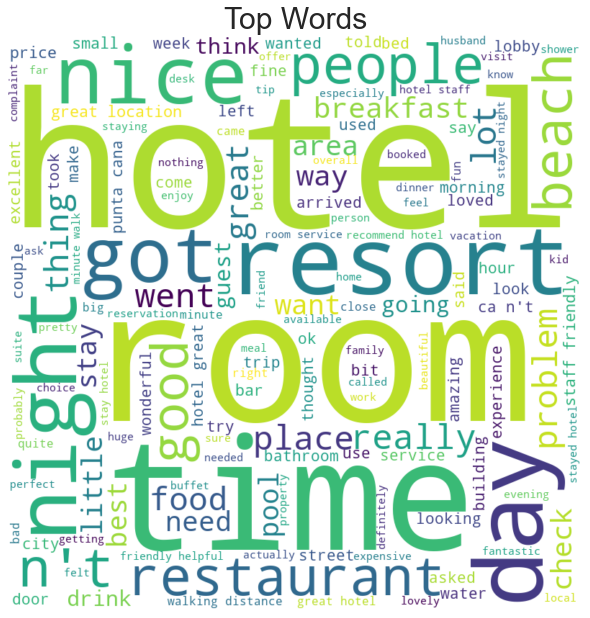

In [16]:
#Word Cloud generator for Reviews

data = df['Review']
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(data.values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top Words",fontsize=30)
plt.show()

In [17]:
import tensorflow as tf

#import tensorflow.compat.v1 as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_hub as hub




x_Reshaped = np.reshape(x_Main,20491)

#Pre-trained text embedding

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
x_New = embed(x_Reshaped)
#x_Features = pd.DataFrame(x_New)



In [18]:
print(x_New.shape, x_New.dtype)

(20491, 128) <dtype: 'float32'>


In [19]:
y_Labels = y_Main.copy()
print(y_Labels.shape, y_Labels.dtype)

(20491,) int64


In [20]:
print(x_New)

tf.Tensor(
[[ 0.20585984  0.18637095 -0.15752402 ... -0.0944639   0.5119964
  -0.01507805]
 [ 0.24491759  0.6142323  -0.15370035 ... -0.30324394  0.6917187
  -0.1235842 ]
 [ 0.02124509  0.52650404 -0.2957632  ... -0.38237888  0.7460834
  -0.1734074 ]
 ...
 [ 0.06914312  0.29563522 -0.17144734 ... -0.5006316   0.4049592
  -0.11970636]
 [ 0.4242196   1.065797   -0.12848337 ... -0.24944922  0.85995525
   0.14251286]
 [ 0.16960736  0.37283498 -0.05605149 ... -0.07607685  0.53097796
   0.16431849]], shape=(20491, 128), dtype=float32)


In [21]:
x_Newnum = x_New.numpy()

In [22]:
print(x_Newnum)

[[ 0.20585984  0.18637095 -0.15752402 ... -0.0944639   0.5119964
  -0.01507805]
 [ 0.24491759  0.6142323  -0.15370035 ... -0.30324394  0.6917187
  -0.1235842 ]
 [ 0.02124509  0.52650404 -0.2957632  ... -0.38237888  0.7460834
  -0.1734074 ]
 ...
 [ 0.06914312  0.29563522 -0.17144734 ... -0.5006316   0.4049592
  -0.11970636]
 [ 0.4242196   1.065797   -0.12848337 ... -0.24944922  0.85995525
   0.14251286]
 [ 0.16960736  0.37283498 -0.05605149 ... -0.07607685  0.53097796
   0.16431849]]


In [23]:
x_Features = pd.DataFrame(x_Newnum)

In [24]:
x_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.205860,0.186371,-0.157524,0.156108,0.095656,-0.050985,0.249086,-0.020314,0.021824,0.349959,...,-0.123180,0.148279,-0.013220,-0.397213,0.004751,0.262515,0.004985,-0.094464,0.511996,-0.015078
1,0.244918,0.614232,-0.153700,-0.434533,0.005590,0.026822,0.273999,-0.019168,-0.255772,0.855414,...,-0.147716,0.226924,0.066579,-0.399368,0.113825,0.098914,-0.209731,-0.303244,0.691719,-0.123584
2,0.021245,0.526504,-0.295763,-0.017019,0.214639,0.040551,0.125150,-0.113674,-0.156098,0.843271,...,-0.292857,0.172671,0.245776,-0.449023,-0.108089,-0.027041,-0.146638,-0.382379,0.746083,-0.173407
3,0.107295,0.210992,0.071974,0.063926,-0.146253,0.051463,0.246974,-0.051206,-0.201408,0.363300,...,0.008886,0.138248,0.038652,-0.109283,0.040797,0.003436,-0.041692,-0.109322,0.527363,-0.171979
4,0.018079,0.581979,-0.118254,-0.075002,-0.119192,-0.024644,0.110495,0.079604,-0.253825,0.789282,...,-0.056085,0.212131,0.035114,-0.472945,0.232486,0.088558,-0.055281,-0.100096,0.600199,-0.024315


In [25]:
#changing the rating as categrical and applying one hot encoding

encoding = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
labels = ['1', '2', '3', '4', '5']
           
y = y_Labels.copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

In [26]:
print(y.shape)

(20491, 5)


In [27]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = x_Features
#y = y_Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
     
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))


Epoch 1/100
2869/2869 [==============================] - 6s 2ms/step - loss: 0.4360 - accuracy: 0.7913 - precision: 0.4666 - recall: 0.3036 - val_loss: 0.4383 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 2/100
2869/2869 [==============================] - 6s 2ms/step - loss: 0.4373 - accuracy: 0.7842 - precision: 0.4479 - recall: 0.3389 - val_loss: 0.4382 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 3/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4370 - accuracy: 0.7856 - precision: 0.4509 - recall: 0.3313 - val_loss: 0.4378 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 4/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4370 - accuracy: 0.7843 - precision: 0.4485 - recall: 0.3412 - val_loss: 0.4377 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 5/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4369 - accura

Epoch 37/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4374 - accuracy: 0.7826 - precision: 0.4451 - recall: 0.3526 - val_loss: 0.4366 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 38/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4373 - accuracy: 0.7840 - precision: 0.4470 - recall: 0.3365 - val_loss: 0.4371 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 39/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4370 - accuracy: 0.7829 - precision: 0.4467 - recall: 0.3584 - val_loss: 0.4387 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 40/100
2869/2869 [==============================] - 6s 2ms/step - loss: 0.4371 - accuracy: 0.7837 - precision: 0.4479 - recall: 0.3494 - val_loss: 0.4368 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 41/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4370 - a

Epoch 73/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4374 - accuracy: 0.7816 - precision: 0.4432 - recall: 0.3595 - val_loss: 0.4368 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 74/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4372 - accuracy: 0.7815 - precision: 0.4436 - recall: 0.3631 - val_loss: 0.4395 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 75/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4375 - accuracy: 0.7829 - precision: 0.4422 - recall: 0.3272 - val_loss: 0.4374 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 76/100
2869/2869 [==============================] - 6s 2ms/step - loss: 0.4372 - accuracy: 0.7833 - precision: 0.4459 - recall: 0.3443 - val_loss: 0.4382 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 77/100
2869/2869 [==============================] - 5s 2ms/step - loss: 0.

Text(0.5, 1.0, 'Training and Validation accuracy')

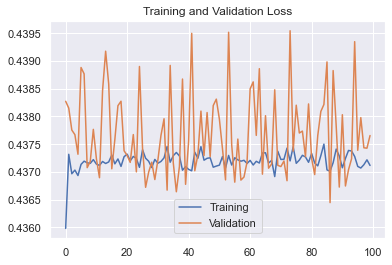

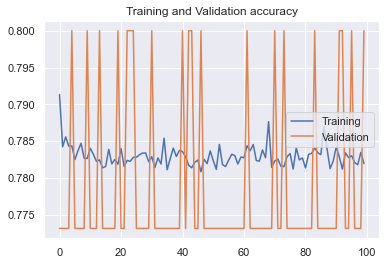

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Dropout, Bidirectional
from keras.regularizers import l1


tf.random.set_seed(42)


model = Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64, kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/100
2869/2869 [==============================] - 5s 2ms/step - loss: 9.3590 - accuracy: 0.7853 - precision: 0.4435 - recall: 0.2884 - val_loss: 12.5000 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2869/2869 [==============================] - 4s 1ms/step - loss: 9.7280 - accuracy: 0.7856 - precision: 0.4448 - recall: 0.2896 - val_loss: 6.5874 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 3/100
2869/2869 [==============================] - 4s 2ms/step - loss: 3.9437 - accuracy: 0.7853 - precision: 0.4443 - recall: 0.2927 - val_loss: 1.1923 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 4/100
2869/2869 [==============================] - 5s 2ms/step - loss: 9.9783 - accuracy: 0.7854 - precision: 0.4442 - recall: 0.2905 - val_loss: 9.3517 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 5/100
2869/2869 [==============================] - 5s 2ms/step - loss: 8.8913

2869/2869 [==============================] - 4s 1ms/step - loss: 3.7615 - accuracy: 0.7843 - precision: 0.4442 - recall: 0.3135 - val_loss: 2.9462 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 37/100
2869/2869 [==============================] - 4s 1ms/step - loss: 2.9107 - accuracy: 0.7852 - precision: 0.4438 - recall: 0.2916 - val_loss: 2.3154 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 38/100
2869/2869 [==============================] - 4s 1ms/step - loss: 2.1001 - accuracy: 0.7840 - precision: 0.4434 - recall: 0.3126 - val_loss: 1.8920 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 39/100
2869/2869 [==============================] - 4s 1ms/step - loss: 1.6657 - accuracy: 0.7844 - precision: 0.4441 - recall: 0.3103 - val_loss: 1.3291 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 40/100
2869/2869 [==============================] - 4s 1ms/step - loss: 1.1833 - accura

2869/2869 [==============================] - 4s 1ms/step - loss: 0.9736 - accuracy: 0.7859 - precision: 0.4462 - recall: 0.2915 - val_loss: 0.9885 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 72/100
2869/2869 [==============================] - 4s 1ms/step - loss: 0.9736 - accuracy: 0.7844 - precision: 0.4408 - recall: 0.2909 - val_loss: 0.9622 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 73/100
2869/2869 [==============================] - 4s 2ms/step - loss: 0.9739 - accuracy: 0.7841 - precision: 0.4412 - recall: 0.2986 - val_loss: 0.9461 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 74/100
2869/2869 [==============================] - 4s 1ms/step - loss: 0.9732 - accuracy: 0.7838 - precision: 0.4414 - recall: 0.3061 - val_loss: 0.9595 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 75/100
2869/2869 [==============================] - 4s 1ms/step - loss:

Text(0.5, 1.0, 'Training and Validation accuracy')

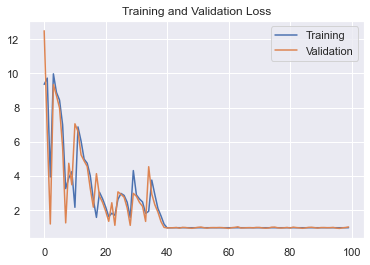

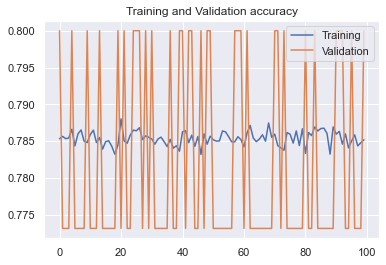

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [32]:
#changing hyper params and testing again

tf.random.set_seed(42)


model = Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(5,activation='softmax'))

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))
model.summary()

Epoch 1/50
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4416 - accuracy: 0.7862 - precision: 0.4466 - recall: 0.2886 - val_loss: 0.4402 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4399 - accuracy: 0.7857 - precision: 0.4449 - recall: 0.2898 - val_loss: 0.4420 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 3/50
2869/2869 [==============================] - 4s 2ms/step - loss: 0.4398 - accuracy: 0.7860 - precision: 0.4463 - recall: 0.2907 - val_loss: 0.4383 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 4/50
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4396 - accuracy: 0.7856 - precision: 0.4447 - recall: 0.2889 - val_loss: 0.4386 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 5/50
2869/2869 [==============================] - 4s 1ms/step - loss: 0.4395 - acc

Epoch 37/50
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4404 - accuracy: 0.7851 - precision: 0.4432 - recall: 0.2900 - val_loss: 0.4374 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 38/50
2869/2869 [==============================] - 4s 2ms/step - loss: 0.4399 - accuracy: 0.7840 - precision: 0.4433 - recall: 0.3124 - val_loss: 0.4379 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 39/50
2869/2869 [==============================] - 4s 1ms/step - loss: 0.4397 - accuracy: 0.7844 - precision: 0.4441 - recall: 0.3103 - val_loss: 0.4557 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 40/50
2869/2869 [==============================] - 5s 2ms/step - loss: 0.4397 - accuracy: 0.7837 - precision: 0.4415 - recall: 0.3077 - val_loss: 0.4404 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 41/50
2869/2869 [==============================] - 4s 2ms/step - loss:

Text(0.5, 1.0, 'Training and Validation accuracy')

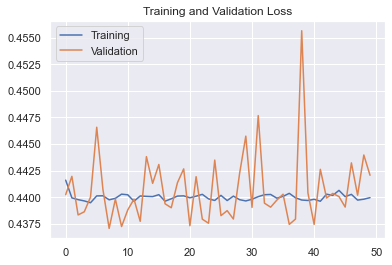

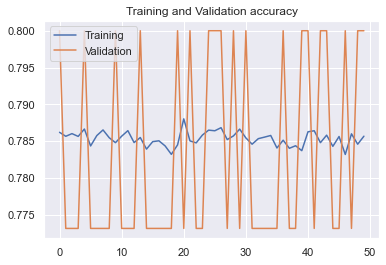

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [34]:
#Changing Hyper params and testing again

tf.random.set_seed(42)

model = Sequential()

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(5,activation='softmax'))

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))
model.summary()

Epoch 1/50
2869/2869 [==============================] - 30s 10ms/step - loss: 1.2322 - accuracy: 0.7860 - precision: 0.4462 - recall: 0.2907 - val_loss: 0.4402 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
2869/2869 [==============================] - 29s 10ms/step - loss: 0.4399 - accuracy: 0.7857 - precision: 0.4449 - recall: 0.2898 - val_loss: 0.4420 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 3/50
2869/2869 [==============================] - 32s 11ms/step - loss: 0.4398 - accuracy: 0.7860 - precision: 0.4463 - recall: 0.2907 - val_loss: 0.4383 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 4/50
2869/2869 [==============================] - 32s 11ms/step - loss: 0.4396 - accuracy: 0.7856 - precision: 0.4447 - recall: 0.2889 - val_loss: 0.4386 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 5/50
2869/2869 [==============================] - 31s 11ms/step - loss: 0.

2869/2869 [==============================] - 37s 13ms/step - loss: 0.4401 - accuracy: 0.7841 - precision: 0.4435 - recall: 0.3127 - val_loss: 0.4403 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 37/50
2869/2869 [==============================] - 37s 13ms/step - loss: 0.4404 - accuracy: 0.7851 - precision: 0.4432 - recall: 0.2900 - val_loss: 0.4374 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 38/50
2869/2869 [==============================] - 31s 11ms/step - loss: 0.4399 - accuracy: 0.7840 - precision: 0.4433 - recall: 0.3124 - val_loss: 0.4379 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 39/50
2869/2869 [==============================] - 31s 11ms/step - loss: 0.4397 - accuracy: 0.7844 - precision: 0.4441 - recall: 0.3103 - val_loss: 0.4557 - val_accuracy: 0.7731 - val_precision: 0.4328 - val_recall: 0.4328
Epoch 40/50
2869/2869 [==============================] - 32s 11ms/step - loss: 0.4397 - 

Text(0.5, 1.0, 'Training and Validation accuracy')

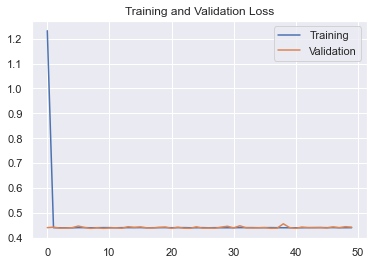

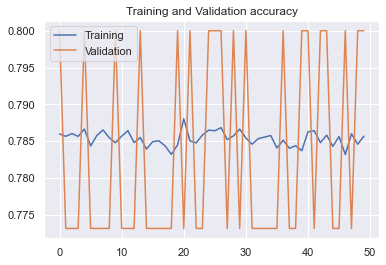

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

The Features generated by the tensor Hub is not able to train and create a Model. So using other method to generate the Fetaures for the Reviews.

In [36]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [40]:
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])
stop = stopwords.words('english')

In [ ]:
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']

In [ ]:
X_cleaned = cleanData(x_Main)
X_cleaned.head()
#X_cleaned.type()

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_temp = X_cleaned.copy()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_temp)
X_temp = tokenizer.texts_to_sequences(X_temp)

In [63]:
len(X_temp[10])

38

In [64]:
max_length = max([len(x) for x in X_temp])
vocab_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
X_temp = pad_sequences(X_temp, max_length ,padding='post')

Vocabulary size: 41923
Max length of sentence: 1795


In [65]:
len(X_temp[11])

1795

In [66]:
X_temp

array([[   8,    1,  180, ...,    0,    0,    0],
       [ 153,  146,  256, ...,    0,    0,    0],
       [   8,    2,   82, ...,    0,    0,    0],
       ...,
       [ 153,   40,    8, ...,    0,    0,    0],
       [   1, 2968, 1290, ...,    0,    0,    0],
       [  30,  431,  388, ...,    0,    0,    0]])

In [71]:
x_New2 = np.array(X_temp)
x_New2.shape

(20491, 1795)

In [76]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split

#X = x_Features
#y = y_Labels

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_New2, y, test_size=0.3, random_state=43)

In [78]:
tf.random.set_seed(43)


model = Sequential()

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64, activation='relu', activity_regularizer=l1(0.01)))
model.add(Dense(5,activation='softmax'))

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_data=(X_test1, y_test1))
model.summary()

Epoch 1/50
449/449 [==============================] - 11s 24ms/step - loss: 7690.1143 - accuracy: 0.7824 - precision: 0.4360 - recall: 0.2990 - val_loss: 0.4399 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 2/50
449/449 [==============================] - 10s 22ms/step - loss: 0.4374 - accuracy: 0.7809 - precision: 0.4358 - recall: 0.3248 - val_loss: 0.4395 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
449/449 [==============================] - 10s 23ms/step - loss: 0.4369 - accuracy: 0.7815 - precision: 0.4381 - recall: 0.3274 - val_loss: 0.4389 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
449/449 [==============================] - 10s 23ms/step - loss: 0.4373 - accuracy: 0.7840 - precision: 0.4409 - recall: 0.2983 - val_loss: 0.4396 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 5/50
449/449 [==============================] - 12s 26ms/step - loss: 0

Epoch 37/50
449/449 [==============================] - 9s 20ms/step - loss: 0.4373 - accuracy: 0.7832 - precision: 0.4403 - recall: 0.3096 - val_loss: 0.4376 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 38/50
449/449 [==============================] - 9s 20ms/step - loss: 0.4370 - accuracy: 0.7846 - precision: 0.4427 - recall: 0.2975 - val_loss: 0.4383 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 39/50
449/449 [==============================] - 9s 20ms/step - loss: 0.4374 - accuracy: 0.7850 - precision: 0.4434 - recall: 0.2930 - val_loss: 0.4419 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 40/50
449/449 [==============================] - 9s 20ms/step - loss: 0.4369 - accuracy: 0.7852 - precision: 0.4460 - recall: 0.3047 - val_loss: 0.4388 - val_accuracy: 0.7770 - val_precision: 0.4424 - val_recall: 0.4424
Epoch 41/50
449/449 [==============================] - 9s 20ms/step - loss: 0.4373 - accuracy: 0

Text(0.5, 1.0, 'Training and Validation accuracy')

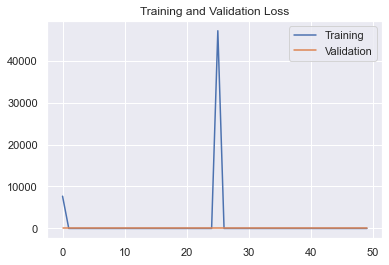

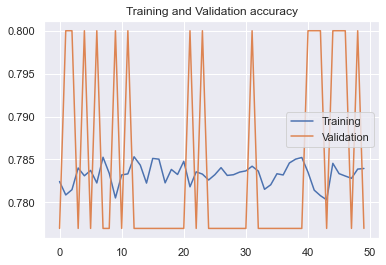

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')